In [2]:
import numpy as np
from cvxopt import solvers, matrix, spmatrix, mul
from pickle import load

%matplotlib inline
import matplotlib.pylab as plt

{'y': <51x1 matrix, tc='d'>, 'u': <51x1 matrix, tc='d'>}


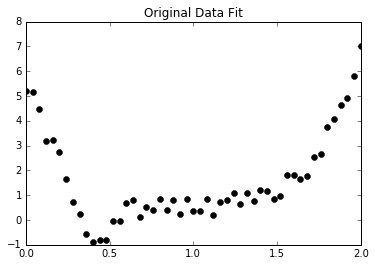

In [24]:
solvers.options['show_progress'] = 0
data = load(open('cvxfit.bin', 'rb'))
u,y = data['u'], data['y']
print data
plt.plot(u, y, 'ko')
plt.title('Original Data Fit')

## Minimization Problem

$argmin \ (1/2)||\hat{y} - y||_2^2$
subject to $\hat{y}_j >= \hat{y}_i + g_i'(u_j - u_i)$

Variables are $\hat{y}(m), g(m)$

In [28]:
m = len(u)
nvars = 2*m

P = spmatrix(1.0, range(m), range(m), (nvars, nvars))
q = matrix(0.0, (nvars, 1))
q[:m] = -y

G = spmatrix([],[],[], (m**2, nvars)) # init empty filler matrix
I = spmatrix(1.0, range(m), range(m)) # identity matrix

print G.size
print I.size
print q.size
print P.size

(2601, 102)
(51, 51)
(102, 1)
(102, 102)


(2601, 1)


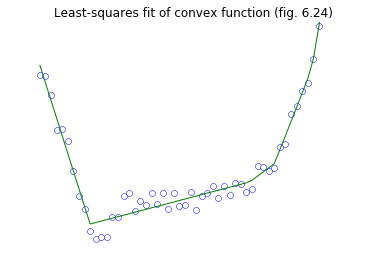

In [29]:
# run through iterations 
for i in range(m):
    # coefficients of yhat[i]
    G[list(range(i*m, (i+1)*m)), i] = 1.0

    # coefficients of g[i]
    G[list(range(i*m, (i+1)*m)), m+i] = u - u[i]

    # coefficients of yhat[j]
    G[list(range(i*m, (i+1)*m)), list(range(m))] -= I

h = matrix(0.0, (m**2,1))

print h.size

sol = solvers.qp(P, q, G, h)
yhat = sol['x'][:m]
g = sol['x'][m:]

nopts = 1000
ts = [ 2.2/nopts * t for t in range(1000) ]
f = [ max(yhat + mul(g, t-u)) for t in ts ]

plt.figure(1, facecolor='w')
plt.plot(u, y, 'wo', markeredgecolor='b')
plt.plot(ts, f, '-g')
plt.axis([-0.1, 2.3, -1.1, 7.2])
plt.axis('off')
plt.title('Least-squares fit of convex function (fig. 6.24)')
plt.show()

In [31]:
from l1regls import l1regls
from cvxopt import normal

m, n = 50, 200
A, b = normal(m,n), normal(m,1)
x = l1regls(A,b)